In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('Student_performance_data .csv')

In [ ]:
#Feature Engineering
# Creating new features based on existing ones

data['StudyEfficienty'] = data['StudyTimeWeekly'] / (data['Absences'] + 1)
data['ActivityScore'] = data[['Extracurricular', 'Sports', 'Music', 'Volunteering']].sum(axis=1)
data['ParentalInfluence'] = data['ParentalEducation'] * 0.4 + data['ParentalSupport'] * 0.6

In [47]:
#To define features (x) and target (y)
X = data.drop(['StudentID', 'GradeClass', 'GPA'], axis=1, errors='ignore')
y = data['GradeClass']

#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
# Initialize and train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


# Make predictions
y_pred_rf = rf.predict(X_test)

In [58]:
# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, target_names=['A', 'B', 'C', 'D', 'F']))


Random Forest Accuracy: 0.6910229645093946

Classification Report:
               precision    recall  f1-score   support

           A       0.50      0.09      0.15        22
           B       0.44      0.47      0.46        49
           C       0.52      0.54      0.53        85
           D       0.51      0.44      0.47        86
           F       0.85      0.94      0.89       237

    accuracy                           0.69       479
   macro avg       0.57      0.50      0.50       479
weighted avg       0.67      0.69      0.67       479



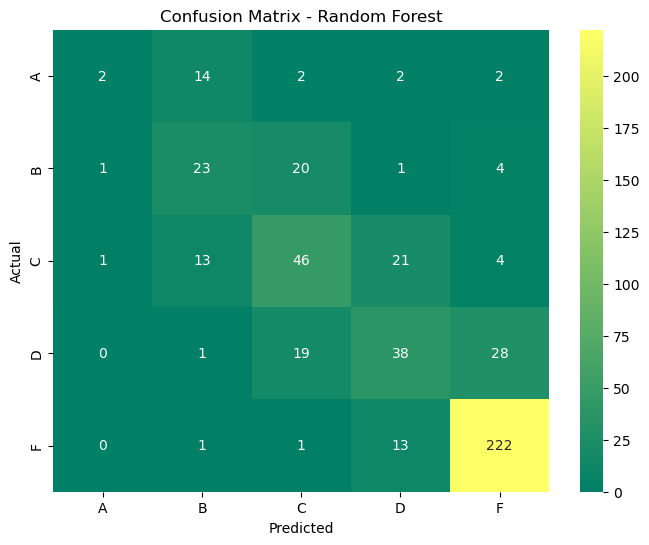

In [81]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='summer', xticklabels=['A', 'B', 'C', 'D', 'F'], yticklabels=['A', 'B', 'C', 'D', 'F'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




Feature Importance:
               Feature  Importance
5            Absences    0.303574
12    StudyEfficienty    0.230066
4     StudyTimeWeekly    0.114772
14  ParentalInfluence    0.060297
0                 Age    0.041684
7     ParentalSupport    0.040201
2           Ethnicity    0.037767
3   ParentalEducation    0.035697
13      ActivityScore    0.030686
1              Gender    0.022776
6            Tutoring    0.021650
8     Extracurricular    0.017929
9              Sports    0.017007
10              Music    0.013803
11       Volunteering    0.012091


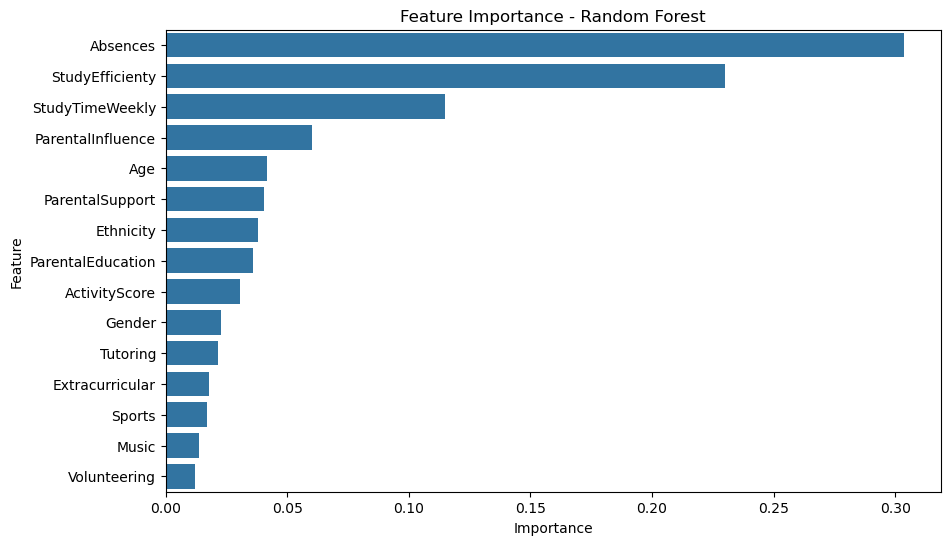

In [60]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance - Random Forest')
plt.show()